# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [26]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [3]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [6]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


In [ ]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [ ]:
# Write your code
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(1000), 
    x_col = 'tip_amount', 
    y_col = 'fare_amount', 
    title = 'tip_amount vs fare_amount', 
    xlabel = 'tip_amount',
    ylabel = 'fare_amount',
)

Now we will remove the passangers that did not tip

In [ ]:
# Remove rows where tip_amount is equal to 0
df_yellow_filtered = df_yellow.loc[df_yellow['tip_amount'] != 0]

from src.utils import create_scatterplot

create_scatterplot(
    df_yellow_filtered.sample(200), 
    x_col = 'tip_amount', 
    y_col = 'fare_amount', 
    title = 'tip_amount vs fare_amount', 
    xlabel = 'tip_amount',
    ylabel = 'fare_amount',
)

This data shows a general trend that the larger the fare amount is, the bigger the tip will be. This excludes people who did not tip.

Comparing passenger amount to total amount in yellow taxis

In [ ]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(200), 
    x_col = 'passenger_count', 
    y_col = 'total_amount', 
    title = 'passenger_count vs total_amount', 
    xlabel = 'passenger_count',
    ylabel = 'total_amount',
)

As seen above, there is no relation to Passenger count and total amount. No yellow taxi had a fee for passenger amount. 

Average tip amount in green taxis vs yellow taxis

In [ ]:
print("Average tip of yellow taxi rider:", df_yellow['tip_amount'].mean())
print("Average tip of green taxi rider:", df_green['tip_amount'].mean())

The average tip between the two types of taxis is roughly a $5 difference. We found this to be surprising so we decided to look at the amount of rides the green taxis get vs the yellow taxis and to see if that might make a difference.

In [ ]:
# looking at the amount of fares difference in yellow vs green taxis
print(df_yellow.shape[0])
print(df_green.shape[0])

taxi_diff = df_yellow.shape[0] - df_green.shape[0]

print(taxi_diff)

There are 38,815,696 more yellow taxi rides then green taxi rides in the year 2022.

In [ ]:
# looking at the average distance traveled between green and yellow taxis
print("Average distance of yellow taxi rider:", df_yellow['trip_distance'].mean())
print("Average distance of green taxi rider:", df_green['trip_distance'].mean())

This is a really interesting difference we found. The average distance the taxis travel are completely different. We may look into this later to see why there is such a big difference. 

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [27]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [28]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


In [29]:
# FOR YELLOW DF
import pandas as pd

# Merged based on 'PULocationID'
merged_yellow_pu = pd.merge(df_yellow, df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merged based on 'DOLocationID'
df_with_coord_yellow = pd.merge(merged_yellow_pu, df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Removed unwanted columns
df_with_coord_yellow.drop(['LocationID_x', 'LocationID_y', 'borough_x', 'Shape_Leng_y', 'Shape_Area_y', 'borough_y', 'Shape_Leng_x', 'Shape_Area_x'], axis=1, inplace=True)

# Renamed columns
df_with_coord_yellow.rename(columns={'lat_x': 'PU_lat', 'lng_x': 'PU_lng', 'lat_y': 'DO_lat', 'lng_y': 'DO_lng', 'zone_x': 'PU_zone', 'zone_y': 'DO_zone'}, inplace=True)

df_with_coord_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_zone,PU_lat,PU_lng,DO_zone,DO_lat,DO_lng
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0.3,21.95,2.5,0.0,Lincoln Square East,40.773906,-73.981352,Upper East Side North,40.780491,-73.956972
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.3,13.30,0.0,0.0,Upper East Side North,40.780491,-73.956972,Central Harlem North,40.821046,-73.939516
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.3,10.56,0.0,0.0,Morningside Heights,40.809570,-73.961815,Morningside Heights,40.809570,-73.961815
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.3,11.80,2.5,0.0,Greenwich Village South,40.728612,-73.998678,East Chelsea,40.748397,-73.999940
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.3,30.30,2.5,0.0,East Chelsea,40.748397,-73.999940,Midtown North,40.764425,-73.978367


In [30]:
# FOR GREEN DF
import pandas as pd

# Merged based on 'PULocationID'
merged_green_pu = pd.merge(df_green, df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merged based on 'DOLocationID'
df_with_coord_green = pd.merge(merged_green_pu, df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Removed unwanted columns
df_with_coord_green.drop(['LocationID_x', 'LocationID_y', 'borough_x', 'Shape_Leng_y', 'Shape_Area_y', 'borough_y', 'Shape_Leng_x', 'Shape_Area_x'], axis=1, inplace=True)

# Renamed columns
df_with_coord_green.rename(columns={'lat_x': 'PU_lat', 'lng_x': 'PU_lng', 'lat_y': 'DO_lat', 'lng_y': 'DO_lng', 'zone_x': 'PU_zone', 'zone_y': 'DO_zone'}, inplace=True)

df_with_coord_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PU_zone,PU_lat,PU_lng,DO_zone,DO_lat,DO_lng
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,4.80,2.0,1.0,0.00,Central Harlem North,40.821046,-73.939516,Central Harlem North,40.821046,-73.939516
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,10.80,2.0,1.0,0.00,Hamilton Heights,40.827535,-73.947368,Central Harlem,40.804205,-73.952065
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,23.15,1.0,1.0,2.75,Central Harlem,40.804205,-73.952065,Lenox Hill East,40.765507,-73.954568
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,9.30,2.0,1.0,0.00,Park Slope,40.672019,-73.979045,Park Slope,40.672019,-73.979045
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,31.26,1.0,1.0,2.75,Brooklyn Heights,40.696238,-73.995329,Murray Hill,40.747654,-73.976942


In [31]:
#FOR YELLOW DF
import pandas as pd
import geopandas as gpd
from keplergl import KeplerGl
from shapely.geometry import LineString

# Assuming you have a DataFrame named df_with_coord_yellow with columns 'PU_lat', 'PU_lng', 'DO_lat', and 'DO_lng'

# Filter out rows with invalid coordinates
valid_coordinates = (~df_with_coord_yellow['PU_lat'].isna()) & (~df_with_coord_yellow['PU_lng'].isna()) & (~df_with_coord_yellow['DO_lat'].isna()) & (~df_with_coord_yellow['DO_lng'].isna())
df_filtered = df_with_coord_yellow[valid_coordinates]

# Count the number of pickups and dropoffs at each location
pickup_counts = df_filtered.groupby(['PU_lat', 'PU_lng']).size().reset_index(name='pickup_count')
dropoff_counts = df_filtered.groupby(['DO_lat', 'DO_lng']).size().reset_index(name='dropoff_count')

# Combine pickup and dropoff counts into a single DataFrame
hotspots = pickup_counts.merge(dropoff_counts, left_on=['PU_lat', 'PU_lng'], right_on=['DO_lat', 'DO_lng'], how='outer').fillna(0)

# Calculate point size based on the count of pickups and dropoffs
hotspots['point_size'] = hotspots['pickup_count'] + hotspots['dropoff_count']

# Set Kepler.gl configuration
config = {
    "version": "v1",
    "config": {
        "mapState": {
            "latitude": hotspots['PU_lat'].mean(),
            "longitude": hotspots['PU_lng'].mean(),
            "zoom": 10
        },
        "visState": {
            "layers": [
                {
                    "id": "Hotspots",
                    "type": "point",
                    "config": {
                        "dataId": "Hotspots",
                        "isVisible": True,
                        "radius": 30,
                        "color": [241, 92, 23],
                        "outline": False,
                        "radiusRange": [0, 200],
                        "radiusScale": 0.5,
                        "stroked": True,
                        "filled": True,
                        "strokedColor": [0, 0, 0],
                        "strokewidth": 1,
                        "enable3d": False,
                        "sizeRange": [0, hotspots['point_size'].max()],
                        "sizeScale": 1
                    }
                },
                {
                    "id": "Connections",
                    "type": "line",
                    "config": {
                        "dataId": "Connections",
                        "isVisible": True,
                        "color": [60, 179, 113],
                        "thickness": 1
                    }
                }
            ]
        }
    }
}

# Create a Kepler.gl map instance
map_1 = KeplerGl(height=600, config=config)

# Add data to Kepler.gl map
map_1.add_data(data=hotspots, name='Hotspots')


# Display the map
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'latitude': 40.56967508532093, 'longitude': -73.6418…

In [32]:
#FOR GREEN DF
import pandas as pd
import geopandas as gpd
from keplergl import KeplerGl
from shapely.geometry import LineString

# Assuming you have a DataFrame named df_with_coord_yellow with columns 'PU_lat', 'PU_lng', 'DO_lat', and 'DO_lng'

# Filter out rows with invalid coordinates
valid_coordinates = (~df_with_coord_green['PU_lat'].isna()) & (~df_with_coord_green['PU_lng'].isna()) & (~df_with_coord_green['DO_lat'].isna()) & (~df_with_coord_green['DO_lng'].isna())
df_filtered = df_with_coord_green[valid_coordinates]

# Count the number of pickups and dropoffs at each location
pickup_counts = df_filtered.groupby(['PU_lat', 'PU_lng']).size().reset_index(name='pickup_count')
dropoff_counts = df_filtered.groupby(['DO_lat', 'DO_lng']).size().reset_index(name='dropoff_count')

# Combine pickup and dropoff counts into a single DataFrame
hotspots = pickup_counts.merge(dropoff_counts, left_on=['PU_lat', 'PU_lng'], right_on=['DO_lat', 'DO_lng'], how='outer').fillna(0)

# Calculate point size based on the count of pickups and dropoffs
hotspots['point_size'] = hotspots['pickup_count'] + hotspots['dropoff_count']

# Set Kepler.gl configuration
config = {
    "version": "v1",
    "config": {
        "mapState": {
            "latitude": hotspots['PU_lat'].mean(),
            "longitude": hotspots['PU_lng'].mean(),
            "zoom": 10
        },
        "visState": {
            "layers": [
                {
                    "id": "Hotspots",
                    "type": "point",
                    "config": {
                        "dataId": "Hotspots",
                        "isVisible": True,
                        "radius": 30,
                        "color": [241, 92, 23],
                        "outline": False,
                        "radiusRange": [0, 200],
                        "radiusScale": 0.5,
                        "stroked": True,
                        "filled": True,
                        "strokedColor": [0, 0, 0],
                        "strokewidth": 1,
                        "enable3d": False,
                        "sizeRange": [0, hotspots['point_size'].max()],
                        "sizeScale": 1
                    }
                },
                {
                    "id": "Connections",
                    "type": "line",
                    "config": {
                        "dataId": "Connections",
                        "isVisible": True,
                        "color": [60, 179, 113],
                        "thickness": 1
                    }
                }
            ]
        }
    }
}

# Create a Kepler.gl map instance
map_1 = KeplerGl(height=600, config=config)

# Add data to Kepler.gl map
map_1.add_data(data=hotspots, name='Hotspots')

# Display the map
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'latitude': 39.920984609883774, 'longitude': -72.452…

For the yellow taxi df, hotspots for both pickup and dropoff are located in Manhattan which was expected. For the green taxi df, hotspots for both pickup and dropoff were located right outside Manhattan and in the neighboring boroughs. The further from Manhattan you got, the less demand for green taxis existed. 

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [ ]:
# Write your code
import pandas as pd
import matplotlib.pyplot as plt

# Analyze temporal patterns for df_yellow
# Extract relevant datetime information
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['hour'] = df_yellow['tpep_pickup_datetime'].dt.hour
df_yellow['day_of_week'] = df_yellow['tpep_pickup_datetime'].dt.dayofweek
df_yellow['month'] = df_yellow['tpep_pickup_datetime'].dt.month


# Number of rides by time of day
rides_by_hour_yellow = df_yellow.groupby('hour').size()

# Number of rides by day of the week
rides_by_day_yellow = df_yellow.groupby('day_of_week').size()

# Number of rides by month
rides_by_month_yellow = df_yellow.groupby('month').size()

# Plotting the temporal patterns for df_yellow
fig1, ax1 = plt.subplots(figsize=(10, 4))
rides_by_hour_yellow.plot(kind='bar', ax=ax1)
ax1.set_title('Number of Rides by Hour (df_yellow)')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Rides')

fig2, ax2 = plt.subplots(figsize=(10, 4))
rides_by_day_yellow.plot(kind='bar', ax=ax2)
ax2.set_title('Number of Rides by Day of the Week (df_yellow)')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Number of Rides')

fig3, ax3 = plt.subplots(figsize=(10, 4))
rides_by_month_yellow.plot(kind='bar', ax=ax3)
ax3.set_title('Number of Rides by Month (df_yellow)')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of Rides')

# Analyze relationship with other variables (e.g., trip distance and fare)
# Scatter plot: Trip distance vs. Hour of pickup


# Rides by month vs Fare amount


# Show the plots
plt.subplots_adjust(hspace=0.5, wspace=1.3)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Analyze temporal patterns for df_yellow
# Extract relevant datetime information
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['hour'] = df_yellow['tpep_pickup_datetime'].dt.hour
df_yellow['day_of_week'] = df_yellow['tpep_pickup_datetime'].dt.dayofweek
df_yellow['month'] = df_yellow['tpep_pickup_datetime'].dt.month


# Number of rides by time of day
rides_by_hour_yellow = df_yellow.groupby('hour').size()

# Number of rides by day of the week
rides_by_day_yellow = df_yellow.groupby('day_of_week').size()

# Number of rides by month
rides_by_month_yellow = df_yellow.groupby('month').size()

avg_dis_by_hour = df_yellow.groupby('hour')['trip_distance'].mean()

avg_tip_by_month = df_yellow.groupby('month')['tip_amount'].mean()


# Analyze relationship with other variables (e.g., trip distance and fare)
# Scatter plot: Trip distance vs. Hour of pickup
plt.figure(figsize=(8, 6))
plt.bar(avg_dis_by_hour.index, avg_dis_by_hour.values)
plt.xlabel('Hour of Pickup')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance vs. Hour of Pickup (df_yellow)')

# Rides by month vs Tip amount
plt.figure(figsize=(8, 6))
plt.bar(avg_tip_by_month.index, avg_tip_by_month.values)
plt.xlabel('Month of Pickup')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount vs. Month of Pickup (df_yellow)')

# Show the plots
plt.subplots_adjust(hspace=0.5, wspace=1.3)
plt.show()


Now looking at green taxis 

In [ ]:
# Write your code
import pandas as pd
import matplotlib.pyplot as plt

# Analyze temporal patterns for df_yellow
# Extract relevant datetime information
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['hour'] = df_green['lpep_pickup_datetime'].dt.hour
df_green['day_of_week'] = df_green['lpep_pickup_datetime'].dt.dayofweek
df_green['month'] = df_green['lpep_pickup_datetime'].dt.month


# Number of rides by time of day
rides_by_hour_green = df_green.groupby('hour').size()

# Number of rides by day of the week
rides_by_day_green = df_green.groupby('day_of_week').size()

# Number of rides by month
rides_by_month_green = df_green.groupby('month').size()

# Plotting the temporal patterns for df_yellow
fig1, ax1 = plt.subplots(figsize=(10, 4))
rides_by_hour_green.plot(kind='bar', ax=ax1)
ax1.set_title('Number of Rides by Hour (df_green)')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Rides')

fig2, ax2 = plt.subplots(figsize=(10, 4))
rides_by_day_green.plot(kind='bar', ax=ax2)
ax2.set_title('Number of Rides by Day of the Week (df_green)')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Number of Rides')

fig3, ax3 = plt.subplots(figsize=(10, 4))
rides_by_month_green.plot(kind='bar', ax=ax3)
ax3.set_title('Number of Rides by Month (df_green)')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of Rides')

# Analyze relationship with other variables (e.g., trip distance and fare)
# Scatter plot: Trip distance vs. Hour of pickup


# Rides by month vs Fare amount


# Show the plots
plt.subplots_adjust(hspace=0.5, wspace=1.3)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Analyze temporal patterns for df_yellow
# Extract relevant datetime information
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['hour'] = df_green['lpep_pickup_datetime'].dt.hour
df_green['day_of_week'] = df_green['lpep_pickup_datetime'].dt.dayofweek
df_green['month'] = df_green['lpep_pickup_datetime'].dt.month


# Number of rides by time of day
rides_by_hour_green = df_green.groupby('hour').size()

# Number of rides by day of the week
rides_by_day_green = df_green.groupby('day_of_week').size()

# Number of rides by month
rides_by_month_green = df_green.groupby('month').size()

avg_dis_by_hour = df_green.groupby('hour')['trip_distance'].mean()

avg_tip_by_month = df_green.groupby('month')['tip_amount'].mean()


# Analyze relationship with other variables (e.g., trip distance and fare)
# Scatter plot: Trip distance vs. Hour of pickup
plt.figure(figsize=(8, 6))
plt.bar(avg_dis_by_hour.index, avg_dis_by_hour.values)
plt.xlabel('Hour of Pickup')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance vs. Hour of Pickup (df_green)')

# Rides by month vs Tip amount
plt.figure(figsize=(8, 6))
plt.bar(avg_tip_by_month.index, avg_tip_by_month.values)
plt.xlabel('Month of Pickup')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount vs. Month of Pickup (df_green)')

# Show the plots
plt.subplots_adjust(hspace=0.5, wspace=1.3)
plt.show()


The graphs shown did not make sense. The average trip distance being almost 300 miles at 5am would mean that they are traveling almost 3 or 4 states over. Therefore we decided to investigate. We first wanted to see what the futhest distances were.

In [ ]:
df_green.sort_values('trip_distance').tail(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
65967,2,2022-06-06 08:47:00,2022-06-06 09:17:00,None,NaN,197,134,NaN,275482.36,12.10,0.0,0.0,0.00,0.00,NaN,0.3,12.40,NaN,NaN,NaN
67459,2,2022-09-24 10:27:00,2022-09-24 10:52:00,None,NaN,116,265,NaN,275731.10,39.69,0.0,0.0,11.25,11.75,NaN,0.3,62.99,NaN,NaN,NaN
62364,2,2022-10-01 11:47:00,2022-10-01 12:04:00,None,NaN,116,239,NaN,276403.57,18.70,0.0,0.0,7.37,0.00,NaN,0.3,29.12,NaN,NaN,NaN
63457,2,2022-07-28 17:10:00,2022-07-28 17:35:00,None,NaN,41,41,NaN,290250.06,11.30,0.0,0.0,0.00,0.00,NaN,0.3,11.60,NaN,NaN,NaN
70796,2,2022-06-21 07:19:00,2022-06-21 07:23:00,None,NaN,7,7,NaN,292061.66,9.98,0.0,0.0,2.40,0.00,NaN,0.3,12.68,NaN,NaN,NaN
63880,2,2022-09-10 09:32:00,2022-09-10 09:45:00,None,NaN,116,143,NaN,295194.47,17.92,0.0,0.0,4.72,0.00,NaN,0.3,25.69,NaN,NaN,NaN
64111,2,2022-09-10 23:55:00,2022-09-11 00:38:00,None,NaN,80,229,NaN,298348.16,26.21,0.0,0.0,0.00,0.00,NaN,0.3,29.26,NaN,NaN,NaN
65706,2,2022-10-16 11:03:00,2022-10-16 11:22:00,None,NaN,223,237,NaN,301385.21,17.96,0.0,0.0,4.73,0.00,NaN,0.3,25.74,NaN,NaN,NaN
66627,2,2022-10-20 21:17:00,2022-10-20 21:30:00,None,NaN,243,116,NaN,305189.98,12.02,0.0,0.0,0.00,0.00,NaN,0.3,12.32,NaN,NaN,NaN
72963,2,2022-05-19 22:48:00,2022-05-19 22:57:00,None,NaN,74,236,NaN,360068.14,10.15,0.0,0.0,2.99,0.00,NaN,0.3,16.19,NaN,NaN,NaN


This data makes no sense. The longest trip distance was 360,068 miles. The circumfrence of the Earth is only 24,901 miles. That would mean that the longest taxi ride circled the Earth almost 15 times! Knowing this, we decided to filter the data. We filtered by fare amount that would equal 0 and trip distances less than 50 miles.

In [ ]:
import numpy as np

df_green_filtered = df_green[
    (df_green.trip_distance <= 50)
    &
   (df_green.fare_amount > 0)
]
df_green_filtered.sort_values('trip_distance').tail(30)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
32219,2,2022-12-16 10:45:11,2022-12-16 20:18:11,N,1.0,179,264,1.0,46.77,322.00,0.00,0.5,0.00,0.00,NaN,0.3,322.80,2.0,1.0,0.00
37039,2,2022-11-20 13:33:42,2022-11-20 14:36:45,N,1.0,82,265,1.0,46.82,122.00,0.00,0.5,0.00,0.00,NaN,0.3,122.80,2.0,1.0,0.00
9108,2,2022-09-05 19:24:35,2022-09-05 20:27:30,N,4.0,16,265,1.0,47.00,230.50,0.00,0.5,0.00,0.00,NaN,0.3,231.30,2.0,1.0,0.00
37990,2,2022-10-20 06:55:16,2022-10-20 11:47:51,N,1.0,223,138,1.0,47.04,199.00,0.00,0.5,0.00,0.00,NaN,0.3,199.80,2.0,1.0,0.00
50629,1,2022-04-23 15:15:49,2022-04-23 16:18:39,N,1.0,129,265,1.0,47.10,121.50,0.00,0.5,0.00,0.00,NaN,0.3,122.30,2.0,1.0,0.00
53892,2,2022-09-27 11:47:23,2022-09-27 21:13:03,N,1.0,8,223,1.0,47.18,338.00,0.00,0.5,0.00,0.00,NaN,0.3,338.80,2.0,1.0,0.00
4423,2,2022-10-03 15:03:37,2022-10-03 19:37:56,N,1.0,223,179,1.0,47.22,189.00,0.00,0.5,0.00,0.00,NaN,0.3,189.80,2.0,1.0,0.00
8665,2,2022-11-04 22:20:23,2022-11-05 00:02:30,N,5.0,244,265,1.0,47.33,150.00,0.00,0.0,0.00,11.75,NaN,0.3,162.05,2.0,2.0,0.00
26024,2,2022-10-14 10:47:35,2022-10-14 21:01:35,N,1.0,223,223,1.0,47.48,344.00,0.00,0.5,0.00,0.00,NaN,0.3,344.80,2.0,1.0,0.00
42763,2,2022-08-23 11:14:56,2022-08-23 17:14:16,N,1.0,223,223,1.0,47.54,239.50,0.00,0.5,0.00,0.00,NaN,0.3,240.30,2.0,1.0,0.00


The data was starting to make sense. We then decided to create a new plot out of the filtered data.

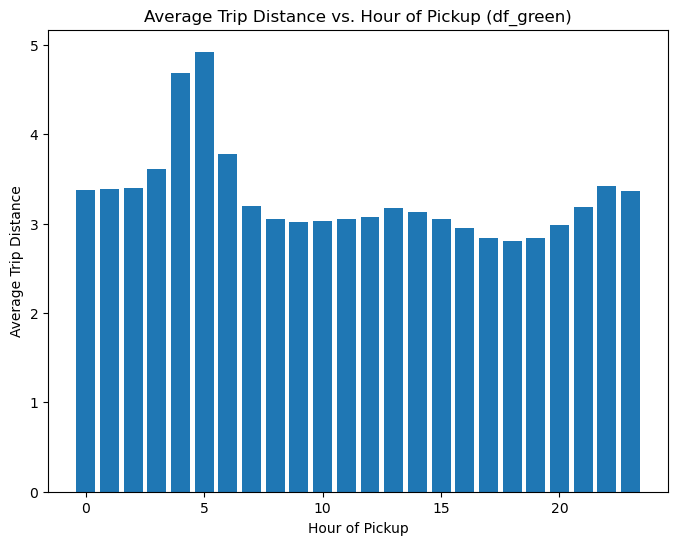

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_green_filtered = df_green[
    (df_green.trip_distance <= 50)
    &
   (df_green.fare_amount > 0)
]

# Analyze temporal patterns for df_yellow
# Extract relevant datetime information
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['hour'] = df_green['lpep_pickup_datetime'].dt.hour
df_green['day_of_week'] = df_green['lpep_pickup_datetime'].dt.dayofweek
df_green['month'] = df_green['lpep_pickup_datetime'].dt.month


# Number of rides by time of day
rides_by_hour_green = df_green_filtered.groupby('hour').size()

# Number of rides by day of the week
rides_by_day_green = df_green_filtered.groupby('day_of_week').size()

# Number of rides by month
rides_by_month_green = df_green_filtered.groupby('month').size()

avg_dis_by_hour = df_green_filtered.groupby('hour')['trip_distance'].mean()



# Analyze relationship with other variables (e.g., trip distance and fare)
# Scatter plot: Trip distance vs. Hour of pickup
plt.figure(figsize=(8, 6))
plt.bar(avg_dis_by_hour.index, avg_dis_by_hour.values)
plt.xlabel('Hour of Pickup')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance vs. Hour of Pickup (df_green)')


# Show the plots
plt.subplots_adjust(hspace=0.5, wspace=1.3)
plt.show()


The plot now makes sense.

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

### Forecasting 7 days of Yellow Taxis Ride Counts

1. We import the first 2 months of 2023 that will be used to forecast the next 7 days of the yellow taxi dataframe

In [1]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2023'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)
df_zones = load_data_from_google_drive(url=zones_url)

# FOR YELLOW DF
import pandas as pd

# Merged based on 'PULocationID'
merged_yellow_pu = pd.merge(df_yellow, df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merged based on 'DOLocationID'
df_with_coord_yellow = pd.merge(merged_yellow_pu, df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Removed unwanted columns
df_with_coord_yellow.drop(['LocationID_x', 'LocationID_y', 'borough_x', 'Shape_Leng_y', 'Shape_Area_y', 'borough_y', 'Shape_Leng_x', 'Shape_Area_x'], axis=1, inplace=True)

# Renamed columns
df_with_coord_yellow.rename(columns={'lat_x': 'PU_lat', 'lng_x': 'PU_lng', 'lat_y': 'DO_lat', 'lng_y': 'DO_lng', 'zone_x': 'PU_zone', 'zone_y': 'DO_zone'}, inplace=True)

2. We extract the pickup_datetime from the original df_yellow into a new dataframe under column 'date'. From df_yellow, the exact number of pickups for a certain day were summated and inserted into the new dataframe under 'number_of_rides'

In [2]:
df_with_coord_yellow['pickup_datetime'] = pd.to_datetime(df_with_coord_yellow['tpep_pickup_datetime'])
df_with_coord_yellow['date'] = df_with_coord_yellow['pickup_datetime'].dt.floor('D')
df_with_coord_yellow_2023 = df_with_coord_yellow[df_with_coord_yellow['pickup_datetime'].dt.year == 2023]
df_rides_test = df_with_coord_yellow_2023['date'].value_counts().reset_index()
df_rides_test.columns = ['date', 'number_of_rides']
df_rides_test = df_rides_test.sort_values('date').reset_index(drop=True)
df_rides_test = df_rides_test.drop(range(59, 62)).reset_index(drop=True)

df_rides_test.tail(20)

,date,number_of_rides
39,2023-02-09,115145
40,2023-02-10,114408
41,2023-02-11,114516
42,2023-02-12,94444
43,2023-02-13,93011
44,2023-02-14,108371
45,2023-02-15,110684
46,2023-02-16,112834
47,2023-02-17,111776
48,2023-02-18,105304


3. We import March of 2023 that will be used as a comparison to the forecasted 7 days.

In [3]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['03']
year = '2023'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

# FOR YELLOW DF
import pandas as pd

# Merged based on 'PULocationID'
merged_yellow_pu = pd.merge(df_yellow, df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merged based on 'DOLocationID'
df_with_coord_yellow = pd.merge(merged_yellow_pu, df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Removed unwanted columns
df_with_coord_yellow.drop(['LocationID_x', 'LocationID_y', 'borough_x', 'Shape_Leng_y', 'Shape_Area_y', 'borough_y', 'Shape_Leng_x', 'Shape_Area_x'], axis=1, inplace=True)

# Renamed columns
df_with_coord_yellow.rename(columns={'lat_x': 'PU_lat', 'lng_x': 'PU_lng', 'lat_y': 'DO_lat', 'lng_y': 'DO_lng', 'zone_x': 'PU_zone', 'zone_y': 'DO_zone'}, inplace=True)

4. We extract the pickup_datetime from the original df_yellow into a new dataframe under column 'date'. From df_yellow, the exact number of pickups for a certain day were summated and inserted into the new dataframe under 'number_of_rides'. We filter it to only show the first 7 days of March 2023.

In [4]:
df_with_coord_yellow['pickup_datetime'] = pd.to_datetime(df_with_coord_yellow['tpep_pickup_datetime'])
df_with_coord_yellow['date'] = df_with_coord_yellow['pickup_datetime'].dt.floor('D')
df_with_coord_yellow_2023 = df_with_coord_yellow[df_with_coord_yellow['pickup_datetime'].dt.year == 2023]
df_rides_actual = df_with_coord_yellow_2023['date'].value_counts().reset_index()
df_rides_actual.columns = ['date', 'number_of_rides']
df_rides_actual = df_rides_actual.sort_values('date').reset_index(drop=True)
df_rides_actual = df_rides_actual.drop(range(0,5)).drop(range(12,40)).reset_index(drop=True)

df_rides_actual.tail()

,date,number_of_rides
2,2023-03-03,116468
3,2023-03-04,113239
4,2023-03-05,97057
5,2023-03-06,93575
6,2023-03-07,113851


5. We create and fit the prophet model to forecast the first 7 days of March 2023. We compare to the actual values of the first 7 days of March 2023 and calculate accuracy metrics .

In [7]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare the DataFrame for Prophet
df_prophet = df_rides_test[['date', 'number_of_rides']].copy()
df_prophet.columns = ['ds', 'y']

# Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a DataFrame with future dates
future_dates = model.make_future_dataframe(periods=7, freq='D')  # 120 days for the next 4 months

# Generate the forecast
forecast = model.predict(future_dates)

# Filter the forecast for the next 7 days
forecast_next_7_days = forecast.tail(7)  # Select the last 120 rows

# Select the relevant columns
forecast_next_7_days = forecast_next_7_days[['ds', 'yhat']]
forecast_next_7_days.columns = ['date', 'number_of_rides_forecast']

# Reset the index
forecast_next_7_days.reset_index(drop=True, inplace=True)

# Prepare the actual values DataFrame (assuming you have another DataFrame named 'df_actual' with the actual values)
df_actual = df_rides_actual[['date', 'number_of_rides']]
df_actual.columns = ['date', 'number_of_rides_actual']

# Merge the forecasted and actual values DataFrames
df_compare = pd.merge(forecast_next_7_days, df_actual, on='date', how='inner')

# Calculate accuracy metrics
mae = mean_absolute_error(df_compare['number_of_rides_actual'], df_compare['number_of_rides_forecast'])
rmse = mean_squared_error(df_compare['number_of_rides_actual'], df_compare['number_of_rides_forecast'], squared=False)

# Calculate the absolute percentage error for each data point
df_compare['absolute_percentage_error'] = abs((df_compare['number_of_rides_actual'] - df_compare['number_of_rides_forecast']) / df_compare['number_of_rides_actual'])

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = (1 / len(df_compare)) * (df_compare['absolute_percentage_error'].sum() * 100)

# Calculate the accuracy as 100 - MAPE
accuracy = 100 - mape

print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
print('Accuracy:', accuracy)


10:35:52 - cmdstanpy - INFO - Chain [1] start processing
10:35:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 4435.25712649045
Root Mean Squared Error (RMSE): 5065.490093378206
Accuracy: 95.90073214443446


6. We create graph showcasing the forecasted vs. actual number of rides for the first 7 days of March in 2023

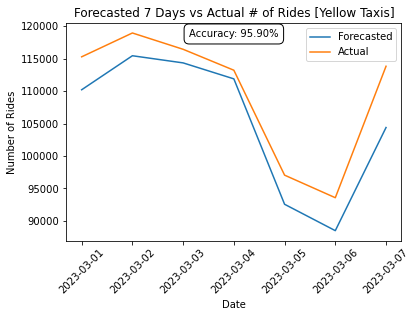

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Convert columns to NumPy arrays
forecast_dates = np.array(forecast_next_7_days['date'])
forecast_values = np.array(forecast_next_7_days['number_of_rides_forecast'])
actual_dates = np.array(df_actual['date'])
actual_values = np.array(df_actual['number_of_rides_actual'])

# Plotting the forecasted values
plt.plot(forecast_dates, forecast_values, label='Forecasted')

# Plotting the actual values
plt.plot(actual_dates, actual_values, label='Actual')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Forecasted 7 Days vs Actual # of Rides [Yellow Taxis]')
plt.xticks(rotation=45)
accuracy_text = f"Accuracy: {accuracy:.2f}%"
plt.text(0.5, 0.95, accuracy_text, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.legend()
plt.show()



### Forecasting 14 days of Yellow Taxi Ride Counts

10:40:45 - cmdstanpy - INFO - Chain [1] start processing
10:40:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 4885.389569472178
Root Mean Squared Error (RMSE): 5725.024691023922
Accuracy: 95.53789192947877


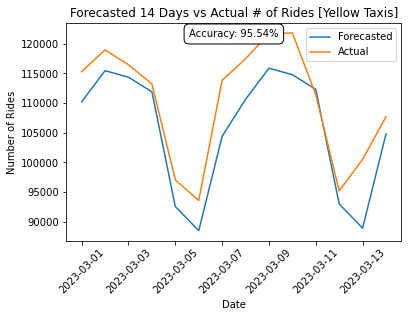

In [14]:
df_rides_actual = df_with_coord_yellow_2023['date'].value_counts().reset_index()
df_rides_actual.columns = ['date', 'number_of_rides']
df_rides_actual = df_rides_actual.sort_values('date').reset_index(drop=True)
df_rides_actual = df_rides_actual.drop(range(0,5)).drop(range(19,40)).reset_index(drop=True)

# Prepare the DataFrame for Prophet
df_prophet = df_rides_test[['date', 'number_of_rides']].copy()
df_prophet.columns = ['ds', 'y']

# Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a DataFrame with future dates
future_dates = model.make_future_dataframe(periods=14, freq='D') 

# Generate the forecast
forecast = model.predict(future_dates)

# Filter the forecast for the next 14 days
forecast_next_14_days = forecast.tail(14)  

# Select the relevant columns
forecast_next_14_days = forecast_next_14_days[['ds', 'yhat']]
forecast_next_14_days.columns = ['date', 'number_of_rides_forecast']

# Reset the index
forecast_next_14_days.reset_index(drop=True, inplace=True)

# Prepare the actual values DataFrame (assuming you have another DataFrame named 'df_actual' with the actual values)
df_actual = df_rides_actual[['date', 'number_of_rides']]
df_actual.columns = ['date', 'number_of_rides_actual']

# Merge the forecasted and actual values DataFrames
df_compare = pd.merge(forecast_next_14_days, df_actual, on='date', how='inner')

# Calculate accuracy metrics
mae = mean_absolute_error(df_compare['number_of_rides_actual'], df_compare['number_of_rides_forecast'])
rmse = mean_squared_error(df_compare['number_of_rides_actual'], df_compare['number_of_rides_forecast'], squared=False)

# Calculate the absolute percentage error for each data point
df_compare['absolute_percentage_error'] = abs((df_compare['number_of_rides_actual'] - df_compare['number_of_rides_forecast']) / df_compare['number_of_rides_actual'])

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = (1 / len(df_compare)) * (df_compare['absolute_percentage_error'].sum() * 100)

# Calculate the accuracy as 100 - MAPE
accuracy = 100 - mape

print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
print('Accuracy:', accuracy)

# Convert columns to NumPy arrays
forecast_dates = np.array(forecast_next_14_days['date'])
forecast_values = np.array(forecast_next_14_days['number_of_rides_forecast'])
actual_dates = np.array(df_actual['date'])
actual_values = np.array(df_actual['number_of_rides_actual'])

# Plotting the forecasted values
plt.plot(forecast_dates, forecast_values, label='Forecasted')

# Plotting the actual values
plt.plot(actual_dates, actual_values, label='Actual')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Forecasted 14 Days vs Actual # of Rides [Yellow Taxis]')
plt.xticks(rotation=45)
accuracy_text = f"Accuracy: {accuracy:.2f}%"
plt.text(0.5, 0.95, accuracy_text, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.legend()
plt.show()


### Forecasting 7 Days of Green Taxi Ride Counts

1. We import the first 2 months of 2023 that will be used to forecast the next 7 days of the green taxi dataframe

In [15]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2023'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)
df_zones = load_data_from_google_drive(url=zones_url)

# FOR GREEN DF
import pandas as pd

# Merged based on 'PULocationID'
merged_green_pu = pd.merge(df_green, df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merged based on 'DOLocationID'
df_with_coord_green = pd.merge(merged_green_pu, df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Removed unwanted columns
df_with_coord_green.drop(['LocationID_x', 'LocationID_y', 'borough_x', 'Shape_Leng_y', 'Shape_Area_y', 'borough_y', 'Shape_Leng_x', 'Shape_Area_x'], axis=1, inplace=True)

# Renamed columns
df_with_coord_green.rename(columns={'lat_x': 'PU_lat', 'lng_x': 'PU_lng', 'lat_y': 'DO_lat', 'lng_y': 'DO_lng', 'zone_x': 'PU_zone', 'zone_y': 'DO_zone'}, inplace=True)

2. We extract the pickup_datetime from the original df_yellow into a new dataframe under column 'date'. From df_yellow, the exact number of pickups for a certain day were summated and inserted into the new dataframe under 'number_of_rides'

In [16]:
df_with_coord_green['pickup_datetime'] = pd.to_datetime(df_with_coord_green['lpep_pickup_datetime'])
df_with_coord_green['date'] = df_with_coord_green['pickup_datetime'].dt.floor('D')
df_with_coord_green_2023 = df_with_coord_green[df_with_coord_green['pickup_datetime'].dt.year == 2023]
df_rides_test = df_with_coord_green_2023['date'].value_counts().reset_index()
df_rides_test.columns = ['date', 'number_of_rides']
df_rides_test = df_rides_test.sort_values('date').reset_index(drop=True)
df_rides_test = df_rides_test.drop(df_rides_test.index[59]).reset_index(drop=True)

df_rides_test.tail()

,date,number_of_rides
54,2023-02-24,2705
55,2023-02-25,2088
56,2023-02-26,1724
57,2023-02-27,2421
58,2023-02-28,2229


3. We import March of 2023 that will be used as a comparison to the forecasted 7 days.

In [17]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['03']
year = '2023'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

# FOR GREEN DF
import pandas as pd

# Merged based on 'PULocationID'
merged_green_pu = pd.merge(df_green, df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merged based on 'DOLocationID'
df_with_coord_green = pd.merge(merged_green_pu, df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Removed unwanted columns
df_with_coord_green.drop(['LocationID_x', 'LocationID_y', 'borough_x', 'Shape_Leng_y', 'Shape_Area_y', 'borough_y', 'Shape_Leng_x', 'Shape_Area_x'], axis=1, inplace=True)

# Renamed columns
df_with_coord_green.rename(columns={'lat_x': 'PU_lat', 'lng_x': 'PU_lng', 'lat_y': 'DO_lat', 'lng_y': 'DO_lng', 'zone_x': 'PU_zone', 'zone_y': 'DO_zone'}, inplace=True)

4. We extract the pickup_datetime from the original df_green into a new dataframe under column 'date'. From df_green, the exact number of pickups for a certain day were summated and inserted into the new dataframe under 'number_of_rides'. We filter it to only show the first 7 days of March 2023.

In [18]:
df_with_coord_green['pickup_datetime'] = pd.to_datetime(df_with_coord_green['lpep_pickup_datetime'])
df_with_coord_green['date'] = df_with_coord_green['pickup_datetime'].dt.floor('D')
df_with_coord_green_2023 = df_with_coord_green[df_with_coord_green['pickup_datetime'].dt.year == 2023]
df_rides_actual = df_with_coord_green_2023['date'].value_counts().reset_index()
df_rides_actual.columns = ['date', 'number_of_rides']
df_rides_actual = df_rides_actual.sort_values('date').reset_index(drop=True)
df_rides_actual = df_rides_actual.drop(range(0,5)).drop(range(12,37)).reset_index(drop=True)

df_rides_actual.head(20)

,date,number_of_rides
0,2023-03-01,2634
1,2023-03-02,2601
2,2023-03-03,2741
3,2023-03-04,2191
4,2023-03-05,1863
5,2023-03-06,2322
6,2023-03-07,2610


5. We create and fit the prophet model to forecast the first 7 days of March 2023. We compare to the actual values of the first 7 days of March 2023 and calculate accuracy metrics .

In [22]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare the DataFrame for Prophet
df_prophet = df_rides_test[['date', 'number_of_rides']].copy()
df_prophet.columns = ['ds', 'y']

# Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a DataFrame with future dates
future_dates = model.make_future_dataframe(periods=7, freq='D')  # 120 days for the next 4 months

# Generate the forecast
forecast = model.predict(future_dates)

# Filter the forecast for the next 7 days
forecast_next_7_days = forecast.tail(7)  # Select the last 120 rows

# Select the relevant columns
forecast_next_7_days = forecast_next_7_days[['ds', 'yhat']]
forecast_next_7_days.columns = ['date', 'number_of_rides_forecast']

# Reset the index
forecast_next_7_days.reset_index(drop=True, inplace=True)

# Prepare the actual values DataFrame (assuming you have another DataFrame named 'df_actual' with the actual values)
df_actual = df_rides_actual[['date', 'number_of_rides']]
df_actual.columns = ['date', 'number_of_rides_actual']

# Merge the forecasted and actual values DataFrames
df_compare = pd.merge(forecast_next_7_days, df_actual, on='date', how='inner')

# Calculate accuracy metrics
mae = mean_absolute_error(df_compare['number_of_rides_actual'], df_compare['number_of_rides_forecast'])
rmse = mean_squared_error(df_compare['number_of_rides_actual'], df_compare['number_of_rides_forecast'], squared=False)

# Calculate the absolute percentage error for each data point
df_compare['absolute_percentage_error'] = abs((df_compare['number_of_rides_actual'] - df_compare['number_of_rides_forecast']) / df_compare['number_of_rides_actual'])

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = (1 / len(df_compare)) * (df_compare['absolute_percentage_error'].sum() * 100)

# Calculate the accuracy as 100 - MAPE
accuracy = 100 - mape

print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
print('Accuracy:', accuracy)


10:45:20 - cmdstanpy - INFO - Chain [1] start processing
10:45:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 75.6742769121846
Root Mean Squared Error (RMSE): 99.50552403901442
Accuracy: 96.93702002582557


6. We create graph showcasing the forecasted vs. actual number of rides for the first 7 days of March in 2023

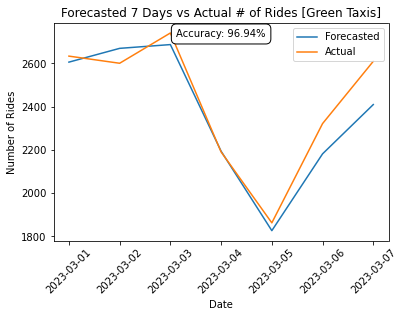

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Convert columns to NumPy arrays
forecast_dates = np.array(forecast_next_7_days['date'])
forecast_values = np.array(forecast_next_7_days['number_of_rides_forecast'])
actual_dates = np.array(df_actual['date'])
actual_values = np.array(df_actual['number_of_rides_actual'])

# Plotting the forecasted values
plt.plot(forecast_dates, forecast_values, label='Forecasted')

# Plotting the actual values
plt.plot(actual_dates, actual_values, label='Actual')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Forecasted 7 Days vs Actual # of Rides [Green Taxis]')
plt.xticks(rotation=45)
accuracy_text = f"Accuracy: {accuracy:.2f}%"
plt.text(0.5, 0.95, accuracy_text, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.legend()
plt.show()



### Forecasting 14 days of Green Taxi Ride Counts

10:46:56 - cmdstanpy - INFO - Chain [1] start processing
10:46:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 94.37865273427087
Root Mean Squared Error (RMSE): 114.57834600540771
Accuracy: 96.06474443637063


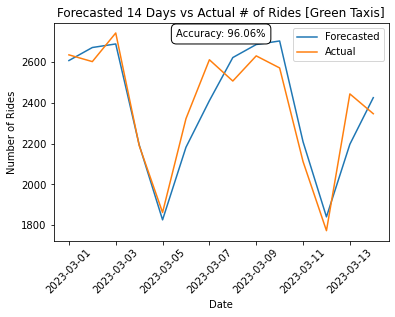

In [24]:
df_rides_actual = df_with_coord_green_2023['date'].value_counts().reset_index()
df_rides_actual.columns = ['date', 'number_of_rides']
df_rides_actual = df_rides_actual.sort_values('date').reset_index(drop=True)
df_rides_actual = df_rides_actual.drop(range(0,5)).drop(range(19,37)).reset_index(drop=True)

# Prepare the DataFrame for Prophet
df_prophet = df_rides_test[['date', 'number_of_rides']].copy()
df_prophet.columns = ['ds', 'y']

# Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a DataFrame with future dates
future_dates = model.make_future_dataframe(periods=14, freq='D') 

# Generate the forecast
forecast = model.predict(future_dates)

# Filter the forecast for the next 14 days
forecast_next_14_days = forecast.tail(14)  

# Select the relevant columns
forecast_next_14_days = forecast_next_14_days[['ds', 'yhat']]
forecast_next_14_days.columns = ['date', 'number_of_rides_forecast']

# Reset the index
forecast_next_14_days.reset_index(drop=True, inplace=True)

# Prepare the actual values DataFrame (assuming you have another DataFrame named 'df_actual' with the actual values)
df_actual = df_rides_actual[['date', 'number_of_rides']]
df_actual.columns = ['date', 'number_of_rides_actual']

# Merge the forecasted and actual values DataFrames
df_compare = pd.merge(forecast_next_14_days, df_actual, on='date', how='inner')

# Calculate accuracy metrics
mae = mean_absolute_error(df_compare['number_of_rides_actual'], df_compare['number_of_rides_forecast'])
rmse = mean_squared_error(df_compare['number_of_rides_actual'], df_compare['number_of_rides_forecast'], squared=False)

# Calculate the absolute percentage error for each data point
df_compare['absolute_percentage_error'] = abs((df_compare['number_of_rides_actual'] - df_compare['number_of_rides_forecast']) / df_compare['number_of_rides_actual'])

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = (1 / len(df_compare)) * (df_compare['absolute_percentage_error'].sum() * 100)

# Calculate the accuracy as 100 - MAPE
accuracy = 100 - mape

print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
print('Accuracy:', accuracy)

# Convert columns to NumPy arrays
forecast_dates = np.array(forecast_next_14_days['date'])
forecast_values = np.array(forecast_next_14_days['number_of_rides_forecast'])
actual_dates = np.array(df_actual['date'])
actual_values = np.array(df_actual['number_of_rides_actual'])

# Plotting the forecasted values
plt.plot(forecast_dates, forecast_values, label='Forecasted')

# Plotting the actual values
plt.plot(actual_dates, actual_values, label='Actual')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Forecasted 14 Days vs Actual # of Rides [Green Taxis]')
plt.xticks(rotation=45)
accuracy_text = f"Accuracy: {accuracy:.2f}%"
plt.text(0.5, 0.95, accuracy_text, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.legend()
plt.show()


For the yellow and green taxi dataframes, the model wsa able to forecast 7 and 14 days of ride counts pretty precisely. Both of the prophet models were able to reflect rises and falls in the ride counts with a few discrepancies on the predicted magnitude of the sudden changes. 

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.